<a href="https://colab.research.google.com/github/filipecarbonera/bootcamp_data_science/blob/main/Modulo02/M%C3%B3dulo_2_super_desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Imunização da Febre Amarela no Brasil - 2010 a 2021**

###**Contexto da Doença:**

A **febre amarela** é uma **doença infecciosa febril aguda**, causada por um **vírus** transmitido por mosquitos vetores, e possui dois ciclos de transmissão: silvestre (quando há transmissão em área rural ou de floresta) e urbano.

O vírus é transmitido pela picada dos mosquitos transmissores infectados e **não há transmissão direta de pessoa a pessoa**.

A febre amarela tem importância epidemiológica por sua **gravidade clínica e potencial de disseminação em áreas urbanas** infestadas pelo mosquito Aedes aegypti.

É uma doença de **notificação compulsória imediata**, ou seja, todo evento suspeito (tanto morte de primatas não humanos, quanto casos humanos com sintomatologia compatível) deve ser prontamente comunicado, em até 24 horas após a suspeita inicial, às autoridades locais competentes pela via mais rápida (telefone, fax, email, etc). Às autoridades estaduais de saúde cabe notificar os eventos de febre amarela suspeitos ao Ministério da Saúde.

**Atualmente**, a febre amarela silvestre (FA) é uma doença endêmica no Brasil (região amazônica). Na região extra-amazônica, períodos epidêmicos são registrados ocasionalmente, caracterizando a reemergência do vírus no País.

O padrão temporal de ocorrência é sazonal, com **a maior parte dos casos incidindo entre dezembro e maio**, e com surtos que ocorrem com periodicidade irregular, quando o vírus encontra condições favoráveis para a transmissão (elevadas temperatura e pluviosidade; alta densidade de vetores e hospedeiros primários; presença de indivíduos suscetíveis; **baixas coberturas vacinais**; eventualmente, novas linhagens do vírus), podendo se dispersar para além dos limites da área endêmica e atingir estados das regiões Centro.

Fonte: https://www.saude.pr.gov.br/Pagina/Febre-amarela#

A vacina é a principal ferramenta de prevenção e controle da febre amarela. **O Sistema Único de Saúde (SUS) oferta vacina contra febre amarela para a população.** **Desde abril de 2017, o Brasil adota o esquema vacinal de apenas uma dose durante toda a vida**, medida que está de acordo com as recomendações da Organização Mundial de Saúde (OMS).

**Toda pessoa que reside em Áreas com Recomendação da Vacina contra febre amarela e pessoas que vão viajar para essas áreas deve se imunizar.**

A vacina, que é administrada via subcutânea, **está disponível durante todo o ano** nas unidades de saúde e deve ser administrada pelo menos 10 dias antes do deslocamento para áreas de risco, principalmente, para os indivíduos que são vacinados pela primeira vez.

**A vacinação para febre amarela é ofertada na rotina dos municípios com recomendação de vacinação.** 

Fonte: https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/f/febre-amarela

###**Suposições e Questionamentos:**


- Em áreas urbanas com maior número de vacinação, ou ocorreu um surto em algum momento ou é um lucal onde as pessoas viajam bastante para áreas de risco da doença.

- Como a doença tem agravamento na região amazônica, vou verificar mais detalhadamente a região.

###**Manipulando os dados:**

**1- Importação Das Bibliotecas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

**2- Importação Dos Dados**

In [ ]:
URL = 'https://raw.githubusercontent.com/filipecarbonera/super_desafio_modulo_02/main/Dados/IMUNIZA%C3%87%C3%95ES_FEBRE_AMARELA_DOSES_APLICADAS_BRASIL_UF_ANO_MES.csv'
dados = pd.read_csv(URL, encoding='ISO-8859-1', sep=';' )

**3- Limpeza Dos Dados**

In [ ]:
dados.head()

,Unidade da Federação,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Set,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez,Total
0,11 Rondônia,7795,7444,11111,16168,16944,12230,13043,13213,8801,7368,7093,5741,6679,7946,8508,9497,14059,11196,10675,12482,7876,7406,10117,6534,9504,8371,8558,8250,14765,10780,9722,10616,7324,6970,6155,5049,7783,6708,7242,...,5271,5578,6697,8202,5181,4916,3965,3261,4769,4624,4438,5060,5392,4768,5103,3912,3546,5579,5415,3895,5478,10089,8805,3851,7765,7304,7247,6797,6162,13398,9438,4695,4131,4707,5139,5725,6189,758,0,1181467
1,12 Acre,3766,4454,5433,7764,8193,5740,3767,4832,3507,3503,4387,4332,10901,10026,14095,13520,13206,9176,6603,5420,5727,7150,5027,5460,4104,4365,4425,5077,6212,6289,4929,4886,3358,5498,4078,2182,3303,2866,3911,...,1799,1602,2060,2054,1525,1692,1532,1308,2093,2082,1874,1914,1986,1748,2033,1855,1511,1687,2093,1895,3438,3606,3225,1129,1710,1636,2049,2023,2540,4796,3056,2046,2137,1670,2088,3341,2112,43,0,524263
2,13 Amazonas,15272,15367,24924,29071,30084,23910,18781,24501,20397,17933,18217,15524,18110,18585,18010,22514,27259,23547,22716,26323,22264,18938,22461,15811,19984,19772,23923,20141,28458,26525,21931,26300,20745,24985,16914,16634,17084,17732,30945,...,14545,12857,22133,23220,16273,15852,11753,9678,14885,14217,16975,14922,14715,13376,12746,15200,13710,12632,12016,9111,33971,23718,22886,2844,14750,21825,18799,20447,17694,36415,20257,12997,8886,11558,15618,16381,17846,1924,0,2951161
3,14 Roraima,3720,2956,3372,3823,3301,2948,2629,3285,3059,2774,2421,2241,2941,3262,3136,3332,3806,2888,3707,2581,2678,1958,2281,2588,3046,3134,2797,2696,923,2859,2728,3038,2743,1979,2322,2102,3025,3093,2672,...,4476,3366,4195,3621,3171,10496,10584,10844,12471,8810,7599,7184,6952,3019,3766,6888,6446,10558,6440,7248,8127,7070,5251,834,1260,1636,3362,2010,2254,3990,2214,2142,3559,3038,3075,3301,1074,161,0,567796
4,15 Pará,22400,25760,31521,33318,33747,37218,33439,41056,33284,26294,28214,25193,22087,27821,28165,35805,53693,42158,38803,40809,32429,30541,31862,24444,27169,29535,36634,32843,40122,42138,34006,43193,33376,29415,28994,20831,24727,27393,30045,...,16815,14527,17804,20365,16733,16428,14237,10253,18276,18095,16634,16787,17784,16816,18015,17929,14513,16512,17187,11453,22671,26914,28736,9192,12290,20284,28866,25252,24397,38106,27100,16034,19721,18146,21387,20612,16803,1401,0,3867120


**Observações:**
- O nome dos estados inicia com um número. É sabido que a dezena desses números indica a região de cada estado, mas como a principio a divisão por regiões não será objeto de minha análise, irei retirá-los.
- Há uma coluna '2021/Dez', que logicamente está apresentando dados advindos de algum erro de registro, pois não há como ter dados de imunização do futuro.
- Há uma colunas de totais que pode ser útil posteriormente, mas certamente irá atrapalhar a visualização gráfica em algunas casos, então vou criar uma variável com e outra sem os totais por estado.

In [ ]:
dados

,Unidade da Federação,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Set,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez,Total
0,11 Rondônia,7795,7444,11111,16168,16944,12230,13043,13213,8801,7368,7093,5741,6679,7946,8508,9497,14059,11196,10675,12482,7876,7406,10117,6534,9504,8371,8558,8250,14765,10780,9722,10616,7324,6970,6155,5049,7783,6708,7242,...,5271,5578,6697,8202,5181,4916,3965,3261,4769,4624,4438,5060,5392,4768,5103,3912,3546,5579,5415,3895,5478,10089,8805,3851,7765,7304,7247,6797,6162,13398,9438,4695,4131,4707,5139,5725,6189,758,0,1181467
1,12 Acre,3766,4454,5433,7764,8193,5740,3767,4832,3507,3503,4387,4332,10901,10026,14095,13520,13206,9176,6603,5420,5727,7150,5027,5460,4104,4365,4425,5077,6212,6289,4929,4886,3358,5498,4078,2182,3303,2866,3911,...,1799,1602,2060,2054,1525,1692,1532,1308,2093,2082,1874,1914,1986,1748,2033,1855,1511,1687,2093,1895,3438,3606,3225,1129,1710,1636,2049,2023,2540,4796,3056,2046,2137,1670,2088,3341,2112,43,0,524263
2,13 Amazonas,15272,15367,24924,29071,30084,23910,18781,24501,20397,17933,18217,15524,18110,18585,18010,22514,27259,23547,22716,26323,22264,18938,22461,15811,19984,19772,23923,20141,28458,26525,21931,26300,20745,24985,16914,16634,17084,17732,30945,...,14545,12857,22133,23220,16273,15852,11753,9678,14885,14217,16975,14922,14715,13376,12746,15200,13710,12632,12016,9111,33971,23718,22886,2844,14750,21825,18799,20447,17694,36415,20257,12997,8886,11558,15618,16381,17846,1924,0,2951161
3,14 Roraima,3720,2956,3372,3823,3301,2948,2629,3285,3059,2774,2421,2241,2941,3262,3136,3332,3806,2888,3707,2581,2678,1958,2281,2588,3046,3134,2797,2696,923,2859,2728,3038,2743,1979,2322,2102,3025,3093,2672,...,4476,3366,4195,3621,3171,10496,10584,10844,12471,8810,7599,7184,6952,3019,3766,6888,6446,10558,6440,7248,8127,7070,5251,834,1260,1636,3362,2010,2254,3990,2214,2142,3559,3038,3075,3301,1074,161,0,567796
4,15 Pará,22400,25760,31521,33318,33747,37218,33439,41056,33284,26294,28214,25193,22087,27821,28165,35805,53693,42158,38803,40809,32429,30541,31862,24444,27169,29535,36634,32843,40122,42138,34006,43193,33376,29415,28994,20831,24727,27393,30045,...,16815,14527,17804,20365,16733,16428,14237,10253,18276,18095,16634,16787,17784,16816,18015,17929,14513,16512,17187,11453,22671,26914,28736,9192,12290,20284,28866,25252,24397,38106,27100,16034,19721,18146,21387,20612,16803,1401,0,3867120
5,16 Amapá,2825,2453,3205,3871,5396,4307,3042,3378,4132,2150,3068,1676,2614,2446,2568,2722,3693,3515,3009,3414,3464,3231,3216,2339,2995,2698,3330,4152,5192,4360,3555,6386,2833,2890,2732,1041,2839,2578,2721,...,1899,1855,2109,2485,2069,2236,1903,1379,2429,2165,2145,1925,1998,2081,2121,2148,1288,2099,1945,1684,2031,1954,2051,340,373,1077,2238,1806,2154,4045,1245,1979,3024,2796,1791,2621,2257,81,0,414642
6,17 Tocantins,8594,9240,13217,22371,18723,12306,6597,9698,6970,5908,6306,4846,6476,6746,7850,9880,9624,8089,5414,8548,6506,6839,7572,5324,7281,6219,8382,6581,10974,7634,5779,9111,6835,7377,6069,3998,6367,6261,7387,...,3517,2844,2911,3673,2581,3015,2653,1932,3673,3013,2762,3032,3379,2799,2549,3311,1928,3326,3666,2381,5066,8315,6248,3585,7078,6250,5696,5022,5031,11769,5889,3600,4684,3855,4523,5345,4816,474,0,982501
7,21 Maranhão,30401,31293,38731,44326,44248,40225,29794,36460,29719,32391,37716,30243,27229,28048,30251,34725,41309,35323,31687,37691,37292,26357,36725,24872,30927,28257,35232,30560,40237,36333,30081,39195,29077,32941,2586

In [ ]:
# Retirando os números no início do nome dos Estados.
dados['Unidade da Federação'][27] = dados['Unidade da Federação'][27].replace('Total','12 Total')
dados['Unidade da Federação'] = dados['Unidade da Federação'].str[3:]
dados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unidade da Federação,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Set,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,...,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Dez,Total
0,Rondônia,7795,7444,11111,16168,16944,12230,13043,13213,8801,7368,7093,5741,6679,7946,8508,9497,14059,11196,10675,12482,7876,7406,10117,6534,9504,8371,8558,8250,14765,10780,9722,10616,7324,6970,6155,5049,7783,6708,7242,...,5271,5578,6697,8202,5181,4916,3965,3261,4769,4624,4438,5060,5392,4768,5103,3912,3546,5579,5415,3895,5478,10089,8805,3851,7765,7304,7247,6797,6162,13398,9438,4695,4131,4707,5139,5725,6189,758,0,1181467
1,Acre,3766,4454,5433,7764,8193,5740,3767,4832,3507,3503,4387,4332,10901,10026,14095,13520,13206,9176,6603,5420,5727,7150,5027,5460,4104,4365,4425,5077,6212,6289,4929,4886,3358,5498,4078,2182,3303,2866,3911,...,1799,1602,2060,2054,1525,1692,1532,1308,2093,2082,1874,1914,1986,1748,2033,1855,1511,1687,2093,1895,3438,3606,3225,1129,1710,1636,2049,2023,2540,4796,3056,2046,2137,1670,2088,3341,2112,43,0,524263
2,Amazonas,15272,15367,24924,29071,30084,23910,18781,24501,20397,17933,18217,15524,18110,18585,18010,22514,27259,23547,22716,26323,22264,18938,22461,15811,19984,19772,23923,20141,28458,26525,21931,26300,20745,24985,16914,16634,17084,17732,30945,...,14545,12857,22133,23220,16273,15852,11753,9678,14885,14217,16975,14922,14715,13376,12746,15200,13710,12632,12016,9111,33971,23718,22886,2844,14750,21825,18799,20447,17694,36415,20257,12997,8886,11558,15618,16381,17846,1924,0,2951161
3,Roraima,3720,2956,3372,3823,3301,2948,2629,3285,3059,2774,2421,2241,2941,3262,3136,3332,3806,2888,3707,2581,2678,1958,2281,2588,3046,3134,2797,2696,923,2859,2728,3038,2743,1979,2322,2102,3025,3093,2672,...,4476,3366,4195,3621,3171,10496,10584,10844,12471,8810,7599,7184,6952,3019,3766,6888,6446,10558,6440,7248,8127,7070,5251,834,1260,1636,3362,2010,2254,3990,2214,2142,3559,3038,3075,3301,1074,161,0,567796
4,Pará,22400,25760,31521,33318,33747,37218,33439,41056,33284,26294,28214,25193,22087,27821,28165,35805,53693,42158,38803,40809,32429,30541,31862,24444,27169,29535,36634,32843,40122,42138,34006,43193,33376,29415,28994,20831,24727,27393,30045,...,16815,14527,17804,20365,16733,16428,14237,10253,18276,18095,16634,16787,17784,16816,18015,17929,14513,16512,17187,11453,22671,26914,28736,9192,12290,20284,28866,25252,24397,38106,27100,16034,19721,18146,21387,20612,16803,1401,0,3867120
5,Amapá,2825,2453,3205,3871,5396,4307,3042,3378,4132,2150,3068,1676,2614,2446,2568,2722,3693,3515,3009,3414,3464,3231,3216,2339,2995,2698,3330,4152,5192,4360,3555,6386,2833,2890,2732,1041,2839,2578,2721,...,1899,1855,2109,2485,2069,2236,1903,1379,2429,2165,2145,1925,1998,2081,2121,2148,1288,2099,1945,1684,2031,1954,2051,340,373,1077,2238,1806,2154,4045,1245,1979,3024,2796,1791,2621,2257,81,0,414642
6,Tocantins,8594,9240,13217,22371,18723,12306,6597,9698,6970,5908,6306,4846,6476,6746,7850,9880,9624,8089,5414,8548,6506,6839,7572,5324,7281,6219,8382,6581,10974,7634,5779,9111,6835,7377,6069,3998,6367,6261,7387,...,3517,2844,2911,3673,2581,3015,2653,1932,3673,3013,2762,3032,3379,2799,2549,3311,1928,3326,3666,2381,5066,8315,6248,3585,7078,6250,5696,5022,5031,11769,5889,3600,4684,3855,4523,5345,4816,474,0,982501
7,Maranhão,30401,31293,38731,44326,44248,40225,29794,36460,29719,32391,37716,30243,27229,28048,30251,34725,41309,35323,31687,37691,37292,26357,36725,24872,30927,28257,35232,30560,40237,36333,30081,39195,29077,32941,25863,18812,20370,19259,2673

In [ ]:
# Retirando a coluna '2021/Dez'.
dados = dados.drop('2021/Dez', axis=1)
dados.head()

,Unidade da Federação,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Set,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,Total
0,Rondônia,7795,7444,11111,16168,16944,12230,13043,13213,8801,7368,7093,5741,6679,7946,8508,9497,14059,11196,10675,12482,7876,7406,10117,6534,9504,8371,8558,8250,14765,10780,9722,10616,7324,6970,6155,5049,7783,6708,7242,...,5111,5271,5578,6697,8202,5181,4916,3965,3261,4769,4624,4438,5060,5392,4768,5103,3912,3546,5579,5415,3895,5478,10089,8805,3851,7765,7304,7247,6797,6162,13398,9438,4695,4131,4707,5139,5725,6189,758,1181467
1,Acre,3766,4454,5433,7764,8193,5740,3767,4832,3507,3503,4387,4332,10901,10026,14095,13520,13206,9176,6603,5420,5727,7150,5027,5460,4104,4365,4425,5077,6212,6289,4929,4886,3358,5498,4078,2182,3303,2866,3911,...,2166,1799,1602,2060,2054,1525,1692,1532,1308,2093,2082,1874,1914,1986,1748,2033,1855,1511,1687,2093,1895,3438,3606,3225,1129,1710,1636,2049,2023,2540,4796,3056,2046,2137,1670,2088,3341,2112,43,524263
2,Amazonas,15272,15367,24924,29071,30084,23910,18781,24501,20397,17933,18217,15524,18110,18585,18010,22514,27259,23547,22716,26323,22264,18938,22461,15811,19984,19772,23923,20141,28458,26525,21931,26300,20745,24985,16914,16634,17084,17732,30945,...,15284,14545,12857,22133,23220,16273,15852,11753,9678,14885,14217,16975,14922,14715,13376,12746,15200,13710,12632,12016,9111,33971,23718,22886,2844,14750,21825,18799,20447,17694,36415,20257,12997,8886,11558,15618,16381,17846,1924,2951161
3,Roraima,3720,2956,3372,3823,3301,2948,2629,3285,3059,2774,2421,2241,2941,3262,3136,3332,3806,2888,3707,2581,2678,1958,2281,2588,3046,3134,2797,2696,923,2859,2728,3038,2743,1979,2322,2102,3025,3093,2672,...,6285,4476,3366,4195,3621,3171,10496,10584,10844,12471,8810,7599,7184,6952,3019,3766,6888,6446,10558,6440,7248,8127,7070,5251,834,1260,1636,3362,2010,2254,3990,2214,2142,3559,3038,3075,3301,1074,161,567796
4,Pará,22400,25760,31521,33318,33747,37218,33439,41056,33284,26294,28214,25193,22087,27821,28165,35805,53693,42158,38803,40809,32429,30541,31862,24444,27169,29535,36634,32843,40122,42138,34006,43193,33376,29415,28994,20831,24727,27393,30045,...,19317,16815,14527,17804,20365,16733,16428,14237,10253,18276,18095,16634,16787,17784,16816,18015,17929,14513,16512,17187,11453,22671,26914,28736,9192,12290,20284,28866,25252,24397,38106,27100,16034,19721,18146,21387,20612,16803,1401,3867120


In [ ]:
# Definindo o nome dos Estados com índices do dataset.
dados = dados.set_index('Unidade da Federação')
dados.head()

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Set,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,7795,7444,11111,16168,16944,12230,13043,13213,8801,7368,7093,5741,6679,7946,8508,9497,14059,11196,10675,12482,7876,7406,10117,6534,9504,8371,8558,8250,14765,10780,9722,10616,7324,6970,6155,5049,7783,6708,7242,12251,...,5111,5271,5578,6697,8202,5181,4916,3965,3261,4769,4624,4438,5060,5392,4768,5103,3912,3546,5579,5415,3895,5478,10089,8805,3851,7765,7304,7247,6797,6162,13398,9438,4695,4131,4707,5139,5725,6189,758,1181467
Acre,3766,4454,5433,7764,8193,5740,3767,4832,3507,3503,4387,4332,10901,10026,14095,13520,13206,9176,6603,5420,5727,7150,5027,5460,4104,4365,4425,5077,6212,6289,4929,4886,3358,5498,4078,2182,3303,2866,3911,4822,...,2166,1799,1602,2060,2054,1525,1692,1532,1308,2093,2082,1874,1914,1986,1748,2033,1855,1511,1687,2093,1895,3438,3606,3225,1129,1710,1636,2049,2023,2540,4796,3056,2046,2137,1670,2088,3341,2112,43,524263
Amazonas,15272,15367,24924,29071,30084,23910,18781,24501,20397,17933,18217,15524,18110,18585,18010,22514,27259,23547,22716,26323,22264,18938,22461,15811,19984,19772,23923,20141,28458,26525,21931,26300,20745,24985,16914,16634,17084,17732,30945,30996,...,15284,14545,12857,22133,23220,16273,15852,11753,9678,14885,14217,16975,14922,14715,13376,12746,15200,13710,12632,12016,9111,33971,23718,22886,2844,14750,21825,18799,20447,17694,36415,20257,12997,8886,11558,15618,16381,17846,1924,2951161
Roraima,3720,2956,3372,3823,3301,2948,2629,3285,3059,2774,2421,2241,2941,3262,3136,3332,3806,2888,3707,2581,2678,1958,2281,2588,3046,3134,2797,2696,923,2859,2728,3038,2743,1979,2322,2102,3025,3093,2672,2871,...,6285,4476,3366,4195,3621,3171,10496,10584,10844,12471,8810,7599,7184,6952,3019,3766,6888,6446,10558,6440,7248,8127,7070,5251,834,1260,1636,3362,2010,2254,3990,2214,2142,3559,3038,3075,3301,1074,161,567796
Pará,22400,25760,31521,33318,33747,37218,33439,41056,33284,26294,28214,25193,22087,27821,28165,35805,53693,42158,38803,40809,32429,30541,31862,24444,27169,29535,36634,32843,40122,42138,34006,43193,33376,29415,28994,20831,24727,27393,30045,34667,...,19317,16815,14527,17804,20365,16733,16428,14237,10253,18276,18095,16634,16787,17784,16816,18015,17929,14513,16512,17187,11453,22671,26914,28736,9192,12290,20284,28866,25252,24397,38106,27100,16034,19721,18146,21387,20612,16803,1401,3867120


In [ ]:
# Verificando os tipos de dados presetes no dataset.
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Rondônia to Total
Columns: 139 entries, 2010/Jan to  Total
dtypes: int64(139)
memory usage: 30.6+ KB


In [ ]:
# Percebe-se que há apenas números inteiros e mais nenhum outro tipo de dado. Seguimos.

In [ ]:
# Verificando se há algum registro em branco no dataset.
dados.mean().isnull().value_counts()

False    139
dtype: int64

**Variáveis que temos até aqui:**
- dados

Vou criar agora uma variável sem a coluna Total.

In [ ]:
dados.head()

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Set,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,7795,7444,11111,16168,16944,12230,13043,13213,8801,7368,7093,5741,6679,7946,8508,9497,14059,11196,10675,12482,7876,7406,10117,6534,9504,8371,8558,8250,14765,10780,9722,10616,7324,6970,6155,5049,7783,6708,7242,12251,...,5111,5271,5578,6697,8202,5181,4916,3965,3261,4769,4624,4438,5060,5392,4768,5103,3912,3546,5579,5415,3895,5478,10089,8805,3851,7765,7304,7247,6797,6162,13398,9438,4695,4131,4707,5139,5725,6189,758,1181467
Acre,3766,4454,5433,7764,8193,5740,3767,4832,3507,3503,4387,4332,10901,10026,14095,13520,13206,9176,6603,5420,5727,7150,5027,5460,4104,4365,4425,5077,6212,6289,4929,4886,3358,5498,4078,2182,3303,2866,3911,4822,...,2166,1799,1602,2060,2054,1525,1692,1532,1308,2093,2082,1874,1914,1986,1748,2033,1855,1511,1687,2093,1895,3438,3606,3225,1129,1710,1636,2049,2023,2540,4796,3056,2046,2137,1670,2088,3341,2112,43,524263
Amazonas,15272,15367,24924,29071,30084,23910,18781,24501,20397,17933,18217,15524,18110,18585,18010,22514,27259,23547,22716,26323,22264,18938,22461,15811,19984,19772,23923,20141,28458,26525,21931,26300,20745,24985,16914,16634,17084,17732,30945,30996,...,15284,14545,12857,22133,23220,16273,15852,11753,9678,14885,14217,16975,14922,14715,13376,12746,15200,13710,12632,12016,9111,33971,23718,22886,2844,14750,21825,18799,20447,17694,36415,20257,12997,8886,11558,15618,16381,17846,1924,2951161
Roraima,3720,2956,3372,3823,3301,2948,2629,3285,3059,2774,2421,2241,2941,3262,3136,3332,3806,2888,3707,2581,2678,1958,2281,2588,3046,3134,2797,2696,923,2859,2728,3038,2743,1979,2322,2102,3025,3093,2672,2871,...,6285,4476,3366,4195,3621,3171,10496,10584,10844,12471,8810,7599,7184,6952,3019,3766,6888,6446,10558,6440,7248,8127,7070,5251,834,1260,1636,3362,2010,2254,3990,2214,2142,3559,3038,3075,3301,1074,161,567796
Pará,22400,25760,31521,33318,33747,37218,33439,41056,33284,26294,28214,25193,22087,27821,28165,35805,53693,42158,38803,40809,32429,30541,31862,24444,27169,29535,36634,32843,40122,42138,34006,43193,33376,29415,28994,20831,24727,27393,30045,34667,...,19317,16815,14527,17804,20365,16733,16428,14237,10253,18276,18095,16634,16787,17784,16816,18015,17929,14513,16512,17187,11453,22671,26914,28736,9192,12290,20284,28866,25252,24397,38106,27100,16034,19721,18146,21387,20612,16803,1401,3867120


In [ ]:
dados_sem_total = dados.drop(' Total', axis=1)
dados_sem_total

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Set,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,7795,7444,11111,16168,16944,12230,13043,13213,8801,7368,7093,5741,6679,7946,8508,9497,14059,11196,10675,12482,7876,7406,10117,6534,9504,8371,8558,8250,14765,10780,9722,10616,7324,6970,6155,5049,7783,6708,7242,12251,...,6375,5111,5271,5578,6697,8202,5181,4916,3965,3261,4769,4624,4438,5060,5392,4768,5103,3912,3546,5579,5415,3895,5478,10089,8805,3851,7765,7304,7247,6797,6162,13398,9438,4695,4131,4707,5139,5725,6189,758
Acre,3766,4454,5433,7764,8193,5740,3767,4832,3507,3503,4387,4332,10901,10026,14095,13520,13206,9176,6603,5420,5727,7150,5027,5460,4104,4365,4425,5077,6212,6289,4929,4886,3358,5498,4078,2182,3303,2866,3911,4822,...,2703,2166,1799,1602,2060,2054,1525,1692,1532,1308,2093,2082,1874,1914,1986,1748,2033,1855,1511,1687,2093,1895,3438,3606,3225,1129,1710,1636,2049,2023,2540,4796,3056,2046,2137,1670,2088,3341,2112,43
Amazonas,15272,15367,24924,29071,30084,23910,18781,24501,20397,17933,18217,15524,18110,18585,18010,22514,27259,23547,22716,26323,22264,18938,22461,15811,19984,19772,23923,20141,28458,26525,21931,26300,20745,24985,16914,16634,17084,17732,30945,30996,...,20706,15284,14545,12857,22133,23220,16273,15852,11753,9678,14885,14217,16975,14922,14715,13376,12746,15200,13710,12632,12016,9111,33971,23718,22886,2844,14750,21825,18799,20447,17694,36415,20257,12997,8886,11558,15618,16381,17846,1924
Roraima,3720,2956,3372,3823,3301,2948,2629,3285,3059,2774,2421,2241,2941,3262,3136,3332,3806,2888,3707,2581,2678,1958,2281,2588,3046,3134,2797,2696,923,2859,2728,3038,2743,1979,2322,2102,3025,3093,2672,2871,...,7040,6285,4476,3366,4195,3621,3171,10496,10584,10844,12471,8810,7599,7184,6952,3019,3766,6888,6446,10558,6440,7248,8127,7070,5251,834,1260,1636,3362,2010,2254,3990,2214,2142,3559,3038,3075,3301,1074,161
Pará,22400,25760,31521,33318,33747,37218,33439,41056,33284,26294,28214,25193,22087,27821,28165,35805,53693,42158,38803,40809,32429,30541,31862,24444,27169,29535,36634,32843,40122,42138,34006,43193,33376,29415,28994,20831,24727,27393,30045,34667,...,27149,19317,16815,14527,17804,20365,16733,16428,14237,10253,18276,18095,16634,16787,17784,16816,18015,17929,14513,16512,17187,11453,22671,26914,28736,9192,12290,20284,28866,25252,24397,38106,27100,16034,19721,18146,21387,20612,16803,1401
Amapá,2825,2453,3205,3871,5396,4307,3042,3378,4132,2150,3068,1676,2614,2446,2568,2722,3693,3515,3009,3414,3464,3231,3216,2339,2995,2698,3330,4152,5192,4360,3555,6386,2833,2890,2732,1041,2839,2578,2721,3579,...,3114,2340,1899,1855,2109,2485,2069,2236,1903,1379,2429,2165,2145,1925,1998,2081,2121,2148,1288,2099,1945,1684,2031,1954,2051,340,373,1077,2238,1806,2154,4045,1245,1979,3024,2796,1791,2621,2257,81
Tocantins,8594,9240,13217,22371,18723,12306,6597,9698,6970,5908,6306,4846,6476,6746,7850,9880,9624,8089,5414,8548,6506,6839,7572,5324,7281,6219,8382,6581,10974,7634,5779,9111,6835,7377,6069,3998,6367,6261,7387,13504,...,4058,3542,3517,2844,2911,3673,2581,3015,2653,1932,3673,3013,2762,3032,3379,2799,2549,3311,1928,3326,3666,2381,5066,8315,6248,3585,7078,6250,5696,5022,5031,11769,5889,3600,4684,3855,4523,5345,4816,474
Maranhão,30401,31293,38731,44326,44248,40225,29794,36460,29719,32391,37716,30243,27229,28048,30251,34725,41309,35323,

**Variáveis que temos até aqui:**
- dados
- dados_sem_total

In [ ]:
# Vou retirar também a linha de total.

dados_sem_totais = dados_sem_total.drop('Total')
dados_sem_totais

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Set,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,7795,7444,11111,16168,16944,12230,13043,13213,8801,7368,7093,5741,6679,7946,8508,9497,14059,11196,10675,12482,7876,7406,10117,6534,9504,8371,8558,8250,14765,10780,9722,10616,7324,6970,6155,5049,7783,6708,7242,12251,...,6375,5111,5271,5578,6697,8202,5181,4916,3965,3261,4769,4624,4438,5060,5392,4768,5103,3912,3546,5579,5415,3895,5478,10089,8805,3851,7765,7304,7247,6797,6162,13398,9438,4695,4131,4707,5139,5725,6189,758
Acre,3766,4454,5433,7764,8193,5740,3767,4832,3507,3503,4387,4332,10901,10026,14095,13520,13206,9176,6603,5420,5727,7150,5027,5460,4104,4365,4425,5077,6212,6289,4929,4886,3358,5498,4078,2182,3303,2866,3911,4822,...,2703,2166,1799,1602,2060,2054,1525,1692,1532,1308,2093,2082,1874,1914,1986,1748,2033,1855,1511,1687,2093,1895,3438,3606,3225,1129,1710,1636,2049,2023,2540,4796,3056,2046,2137,1670,2088,3341,2112,43
Amazonas,15272,15367,24924,29071,30084,23910,18781,24501,20397,17933,18217,15524,18110,18585,18010,22514,27259,23547,22716,26323,22264,18938,22461,15811,19984,19772,23923,20141,28458,26525,21931,26300,20745,24985,16914,16634,17084,17732,30945,30996,...,20706,15284,14545,12857,22133,23220,16273,15852,11753,9678,14885,14217,16975,14922,14715,13376,12746,15200,13710,12632,12016,9111,33971,23718,22886,2844,14750,21825,18799,20447,17694,36415,20257,12997,8886,11558,15618,16381,17846,1924
Roraima,3720,2956,3372,3823,3301,2948,2629,3285,3059,2774,2421,2241,2941,3262,3136,3332,3806,2888,3707,2581,2678,1958,2281,2588,3046,3134,2797,2696,923,2859,2728,3038,2743,1979,2322,2102,3025,3093,2672,2871,...,7040,6285,4476,3366,4195,3621,3171,10496,10584,10844,12471,8810,7599,7184,6952,3019,3766,6888,6446,10558,6440,7248,8127,7070,5251,834,1260,1636,3362,2010,2254,3990,2214,2142,3559,3038,3075,3301,1074,161
Pará,22400,25760,31521,33318,33747,37218,33439,41056,33284,26294,28214,25193,22087,27821,28165,35805,53693,42158,38803,40809,32429,30541,31862,24444,27169,29535,36634,32843,40122,42138,34006,43193,33376,29415,28994,20831,24727,27393,30045,34667,...,27149,19317,16815,14527,17804,20365,16733,16428,14237,10253,18276,18095,16634,16787,17784,16816,18015,17929,14513,16512,17187,11453,22671,26914,28736,9192,12290,20284,28866,25252,24397,38106,27100,16034,19721,18146,21387,20612,16803,1401
Amapá,2825,2453,3205,3871,5396,4307,3042,3378,4132,2150,3068,1676,2614,2446,2568,2722,3693,3515,3009,3414,3464,3231,3216,2339,2995,2698,3330,4152,5192,4360,3555,6386,2833,2890,2732,1041,2839,2578,2721,3579,...,3114,2340,1899,1855,2109,2485,2069,2236,1903,1379,2429,2165,2145,1925,1998,2081,2121,2148,1288,2099,1945,1684,2031,1954,2051,340,373,1077,2238,1806,2154,4045,1245,1979,3024,2796,1791,2621,2257,81
Tocantins,8594,9240,13217,22371,18723,12306,6597,9698,6970,5908,6306,4846,6476,6746,7850,9880,9624,8089,5414,8548,6506,6839,7572,5324,7281,6219,8382,6581,10974,7634,5779,9111,6835,7377,6069,3998,6367,6261,7387,13504,...,4058,3542,3517,2844,2911,3673,2581,3015,2653,1932,3673,3013,2762,3032,3379,2799,2549,3311,1928,3326,3666,2381,5066,8315,6248,3585,7078,6250,5696,5022,5031,11769,5889,3600,4684,3855,4523,5345,4816,474
Maranhão,30401,31293,38731,44326,44248,40225,29794,36460,29719,32391,37716,30243,27229,28048,30251,34725,41309,35323,

**Variáveis que temos até aqui:**
- dados
- dados_sem_total
- dados_sem_totais

###**4 - Análise Exploratória:**

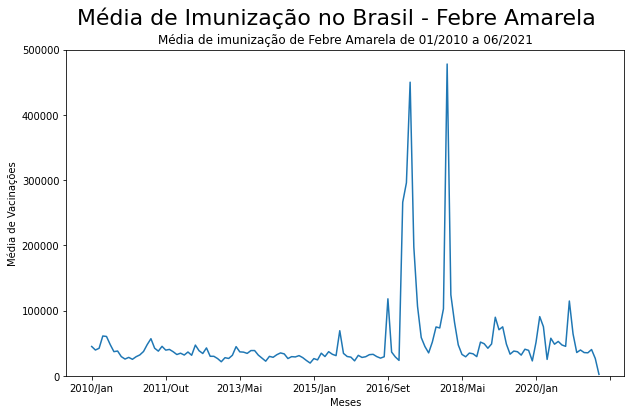

In [ ]:
# Vou verificar inicialmente a média de vacinação no Brasil ao longo dos meses/anos.
dados_sem_total.mean().plot(figsize=(10,6))
plt.suptitle('Média de Imunização no Brasil - Febre Amarela', fontsize=22)
plt.title('Média de imunização de Febre Amarela de 01/2010 a 06/2021', fontsize=12)
plt.ylim(0,500000)
plt.ylabel('Média de Vacinações')
plt.xlabel('Meses')
plt.show()

O período a partir de 2015 teve picos de aumento de vacinações. Talvez seja interessante buscar nesse período com mais detalhes já que a primeira questão levantada foi em relação ao volume em áreas urbanas.

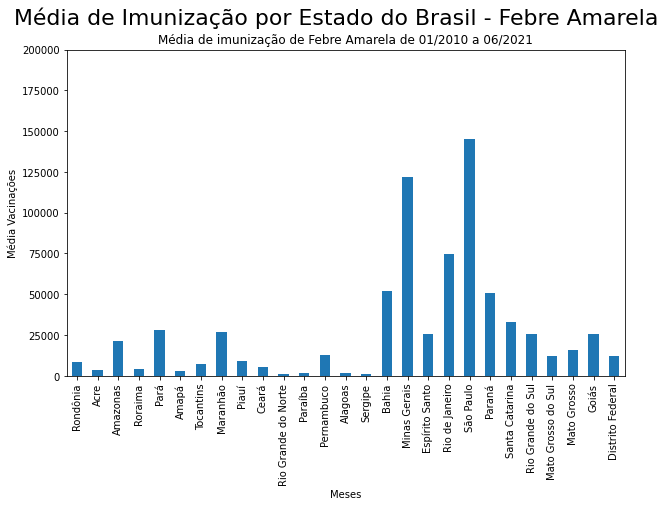

In [ ]:
# Média de vacinação no período total analisado, por Estado.
dados_sem_totais.T.mean().plot.bar(figsize=(10,6))
plt.suptitle('Média de Imunização por Estado do Brasil - Febre Amarela', fontsize=22)
plt.title('Média de imunização de Febre Amarela de 01/2010 a 06/2021', fontsize=12)
plt.ylim(0,200000)
plt.ylabel('Média Vacinações')
plt.xlabel('Meses')
plt.show()

Os estados com maiores imunização contra a Febre Amarela (São Paulo, Minas Gerais e Rio de Janeiro) são estados em que já houveram surtos.

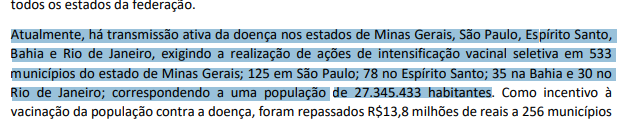

Fonte: https://sistemas.mre.gov.br/kitweb/datafiles/Oslo/pt-br/file/13_Assuntos_para_a_Comunidade/13-11-Febre_amarela.pdf

In [ ]:
# Agora em busca de mais detalhes sobre o Amazonas, vou verificar o período de 2015 até hoje para ter mais detalhes do aumento do volume no período.

dados_sem_total_2015_ = dados_sem_total[dados_sem_total.columns[60:]]
dados_sem_total_2015_

,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,7015,7646,10097,8197,13514,9959,9335,22157,10746,7453,7811,6418,9092,7578,8978,12233,12066,10062,8843,9218,28501,11773,6824,6769,19900,22138,21932,12233,9094,6128,4844,4720,6652,4894,4232,3242,11891,7355,6375,5111,5271,5578,6697,8202,5181,4916,3965,3261,4769,4624,4438,5060,5392,4768,5103,3912,3546,5579,5415,3895,5478,10089,8805,3851,7765,7304,7247,6797,6162,13398,9438,4695,4131,4707,5139,5725,6189,758
Acre,2016,2553,3267,2431,3547,2769,1858,7773,2798,2938,2291,1953,3521,3202,3106,3415,3931,3607,2724,2877,12127,3368,3609,2551,6302,8055,8341,4249,3413,2514,2028,2012,3489,1786,1698,1694,4263,3271,2703,2166,1799,1602,2060,2054,1525,1692,1532,1308,2093,2082,1874,1914,1986,1748,2033,1855,1511,1687,2093,1895,3438,3606,3225,1129,1710,1636,2049,2023,2540,4796,3056,2046,2137,1670,2088,3341,2112,43
Amazonas,18378,22646,29936,25218,28908,25843,22531,47695,27649,23335,22221,19392,24784,17641,22025,21043,23708,20486,18200,25220,72557,22707,19137,13486,43974,37275,53580,26577,23835,13065,14199,14716,23326,13061,12355,10252,25152,16961,20706,15284,14545,12857,22133,23220,16273,15852,11753,9678,14885,14217,16975,14922,14715,13376,12746,15200,13710,12632,12016,9111,33971,23718,22886,2844,14750,21825,18799,20447,17694,36415,20257,12997,8886,11558,15618,16381,17846,1924
Roraima,2453,3730,6870,4726,4477,4461,4166,8260,6113,4238,4225,4503,3039,3762,4776,4532,4632,4499,4142,4278,7099,6224,3993,2528,6447,14520,21824,8822,4448,2723,2789,3478,2291,4790,2262,1606,3206,3576,7040,6285,4476,3366,4195,3621,3171,10496,10584,10844,12471,8810,7599,7184,6952,3019,3766,6888,6446,10558,6440,7248,8127,7070,5251,834,1260,1636,3362,2010,2254,3990,2214,2142,3559,3038,3075,3301,1074,161
Pará,19406,18482,26104,24109,25340,21671,19014,56308,26651,21794,21114,13011,25992,24271,26525,28581,27174,26560,20769,25101,91554,22012,22984,15962,72713,69904,148403,79649,39470,22350,18747,21070,32884,18787,14804,9999,39819,27768,27149,19317,16815,14527,17804,20365,16733,16428,14237,10253,18276,18095,16634,16787,17784,16816,18015,17929,14513,16512,17187,11453,22671,26914,28736,9192,12290,20284,28866,25252,24397,38106,27100,16034,19721,18146,21387,20612,16803,1401
Amapá,2208,1976,2785,2244,3389,2682,3033,7062,4283,3720,3818,2775,4060,4412,4401,3995,3617,3365,3308,4649,9302,3484,3234,2558,5754,6968,8250,5179,4090,2897,2306,2733,5584,2075,2043,1438,4429,3813,3114,2340,1899,1855,2109,2485,2069,2236,1903,1379,2429,2165,2145,1925,1998,2081,2121,2148,1288,2099,1945,1684,2031,1954,2051,340,373,1077,2238,1806,2154,4045,1245,1979,3024,2796,1791,2621,2257,81
Tocantins,6475,5201,8744,7600,10300,11525,8763,23834,12197,9675,8817,5142,7185,6343,8061,10055,8474,7444,4918,6309,25402,8240,6389,3935,23394,27376,20955,7197,6230,4048,2739,3686,4752,2818,2507,2021,8136,5186,4058,3542,3517,2844,2911,3673,2581,3015,2653,1932,3673,3013,2762,3032,3379,2799,2549,3311,1928,3326,3666,2381,5066,8315,6248,3585,7078,6250,5696,5022,5031,11769,5889,3600,4684,3855,4523,5345,4816,474
Maranhão,20991,20606,38792,32054,36838,29725,27202,65908,34774,27907,26136,17465,22535,20229,23681,27754,27600,23026,18967,21093,83665,25646,21472,12178,69144,75751,70023,26913,23266,14796,15422,16751,30430,16929,14055,8497,46286,35104,30531,2

**Variáveis que temos até aqui:**
- dados
- dados_sem_total
- dados_sem_totais
- dados_sem_total_2015_

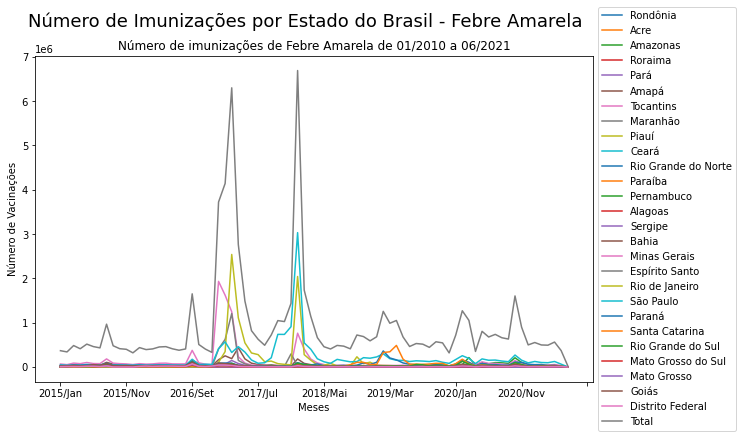

In [ ]:
# Inicialmente com visualização geral dos Estados...
# Total de vacinação por Estado a partir de 2015.
dados_sem_total_2015_.T.plot(figsize=(10,6))
plt.suptitle('Número de Imunizações por Estado do Brasil - Febre Amarela', fontsize=18)
plt.title('Número de imunizações de Febre Amarela de 01/2010 a 06/2021', fontsize=12)
plt.ylabel('Número de Vacinações')
plt.xlabel('Meses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


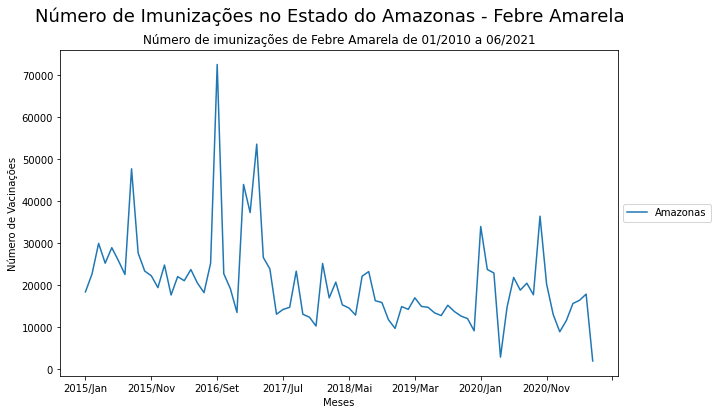

In [ ]:
# Agora verificando dados do Estado em questão...
# Total de vacinação no Amazonas a partir de 2015.
dados_sem_total_2015_.T['Amazonas'].plot(figsize=(10,6))
plt.suptitle('Número de Imunizações no Estado do Amazonas - Febre Amarela', fontsize=18)
plt.title('Número de imunizações de Febre Amarela de 01/2010 a 06/2021', fontsize=12)
plt.ylabel('Número de Vacinações')
plt.xlabel('Meses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Em 2016 e 2017 houveram grandes ações de vacinação no estado do Amazonas, o que explica os dois picos do gráfico nesses períodos.

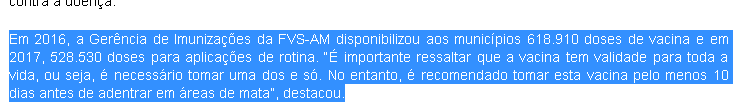

Fonte: http://www.amazonas.am.gov.br/2018/01/com-cobertura-vacinal-de-80-risco-de-surto-de-febre-amarela-no-amazonas-e-minimo-diz-fvs/

Aparentemente, no Amazonas, Estado que é bastante afetado com a Febre Amarela, há uma tendencia de redução da imunização. Isso pode ser explicado pelo fato de a vacina (a partir de 2017) é dose única.



Por fim, vou verificar a situação imunologica no Sul do País, Região onde resido.

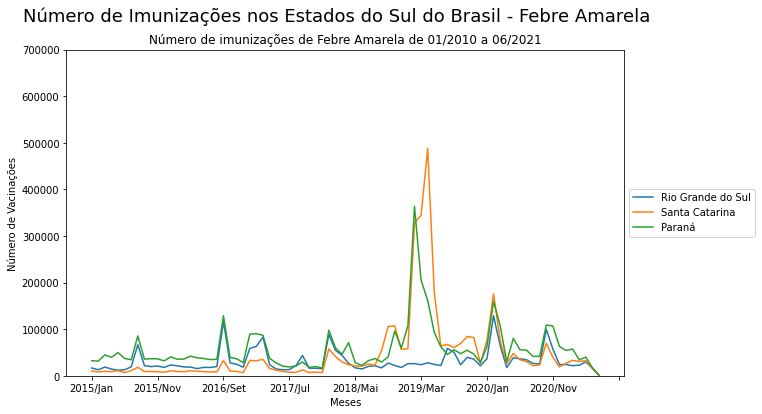

In [ ]:
# Total de vacinação dos Estados do Sul a partir de 2015.
dados_sem_total_2015_.T[['Rio Grande do Sul','Santa Catarina','Paraná']].plot(figsize=(10,6))
plt.suptitle('Número de Imunizações nos Estados do Sul do Brasil - Febre Amarela', fontsize=18)
plt.title('Número de imunizações de Febre Amarela de 01/2010 a 06/2021', fontsize=12)
plt.ylabel('Número de Vacinações')
plt.xlabel('Meses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,700000)
plt.show()

Nos estados da Região Sul parece haver uma tendencia constante com picos em alguns momentos. Isso parece interessante ir mais a fundo.

Buscando na internet não parece haver casos de surto na região Sul. Além disso, os picos de maior imunização nos estados do Sul parecem seguir a tendencia de picos dos demais estados do país.

Aparentemente não há sazonalidade anual nesse quesito.

**Observação:** Busquei dados de gastos do SUS com vacinação, mas não encontrei relativo ao mesmo período. Os dados mais atualizados são de 2006.

### **5 - Conclusões:**

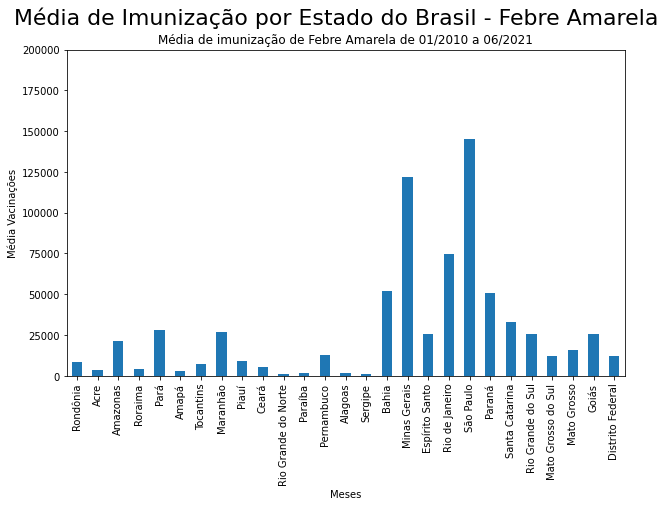

In [ ]:
dados_sem_totais.T.mean().plot.bar(figsize=(10,6))
plt.suptitle('Média de Imunização por Estado do Brasil - Febre Amarela', fontsize=22)
plt.title('Média de imunização de Febre Amarela de 01/2010 a 06/2021', fontsize=12)
plt.ylim(0,200000)
plt.ylabel('Média Vacinações')
plt.xlabel('Meses')
plt.show()

- Os estados com maiores imunização contra a Febre Amarela (São Paulo, Minas Gerais e Rio de Janeiro) são estados em que já houveram surtos.

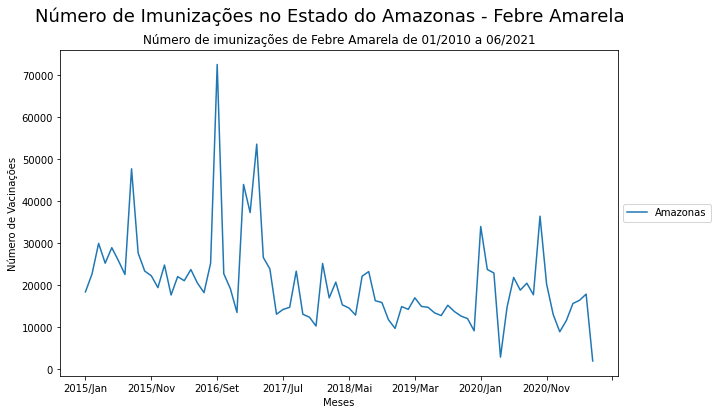

In [ ]:
dados_sem_total_2015_.T['Amazonas'].plot(figsize=(10,6))
plt.suptitle('Número de Imunizações no Estado do Amazonas - Febre Amarela', fontsize=18)
plt.title('Número de imunizações de Febre Amarela de 01/2010 a 06/2021', fontsize=12)
plt.ylabel('Número de Vacinações')
plt.xlabel('Meses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- Em 2016 e 2017 houveram grandes ações de vacinação no estado do Amazonas, o que explica os dois picos do gráfico nesses períodos.
- Aparentemente, no Amazonas, Estado que é bastante afetado com a Febre Amarela, há uma tendencia de redução da imunização. Isso pode ser explicado pelo fato de a vacina (a partir de 2017) é dose única.

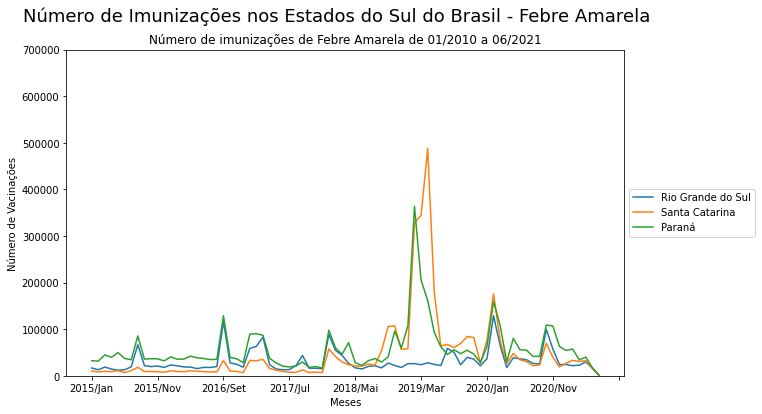

In [ ]:
dados_sem_total_2015_.T[['Rio Grande do Sul','Santa Catarina','Paraná']].plot(figsize=(10,6))
plt.suptitle('Número de Imunizações nos Estados do Sul do Brasil - Febre Amarela', fontsize=18)
plt.title('Número de imunizações de Febre Amarela de 01/2010 a 06/2021', fontsize=12)
plt.ylabel('Número de Vacinações')
plt.xlabel('Meses')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,700000)
plt.show()

- Nos estados da Região Sul parece haver uma tendencia constante com picos em alguns momentos.
-Os picos de maior imunização nos estados do Sul parecem seguir a tendencia de picos dos demais estados do país.
- Aparentemente não há sazonalidade anual nesse quesito.

### **Para análises futuras:**


In [ ]:
# Criando variável para focar em análises de períodos de tempo.
mensal = dados_sem_total_2015_.T
mensal

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal,Total
2015/Jan,7015,2016,18378,2453,19406,2208,6475,20991,6976,1923,773,488,1512,703,515,32954,68873,1452,7531,50480,32238,10107,16741,13893,12585,21377,9342,369405
2015/Fev,7646,2553,22646,3730,18482,1976,5201,20606,5734,1443,710,454,1595,445,574,33081,54767,1078,5605,39718,31588,8326,13020,11660,12604,24466,11791,341499
2015/Mar,10097,3267,29936,6870,26104,2785,8744,38792,9023,1733,669,676,1468,560,338,45011,89018,1342,6281,47464,44829,9742,18759,16062,16947,36660,12061,485238
2015/Abr,8197,2431,25218,4726,24109,2244,7600,32054,7451,1442,1469,578,1712,458,348,41469,76668,972,5974,42321,39617,8841,14524,12272,16305,24016,10254,413270
2015/Mai,13514,3547,28908,4477,25340,3389,10300,36838,7696,1891,920,705,2959,1519,409,43409,102714,1287,6546,59545,49786,10839,11928,19312,20057,31673,18236,517744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021/Fev,4707,1670,11558,3038,18146,2796,3855,13931,7399,21997,1623,9916,30733,8420,368,27060,42547,10616,21269,102394,57541,33077,21737,7731,10951,15994,7556,498630
2021/Mar,5139,2088,15618,3075,21387,1791,4523,15760,7221,15337,1773,10717,34498,11063,301,30956,45417,10219,25350,97906,34339,30816,22662,8088,10970,17419,8967,493400
2021/Abr,5725,3341,16381,3301,20612,2621,5345,18421,7922,13076,1909,12104,37634,10097,313,28257,57506,10797,22045,125655,40005,32844,29791,10281,12038,25399,10493,563913
2021/Mai,6189,2112,17846,1074,16803,2257,4816,12751,7356,10492,1686,7829,27112,10349,296,20512,33294,9032,23924,65691,17647,15808,16206,5986,10516,13293,11676,372553


**Variáveis que temos até aqui:**
- dados
- dados_sem_total
- dados_sem_totais
- dados_sem_total_2015_
- mensal

In [ ]:
# Dicionário identificando o número de cada mês para a definição da função 'para_dia'.
meses = {
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
}

In [ ]:
# Função para transformar em uma data mapeavel os índices do dataset.
def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero = meses[mes]
  return date(ano,mes_numero,1)

mensal.index = mensal.index.map(para_dia)
mensal.index

Index([2015-01-01, 2015-02-01, 2015-03-01, 2015-04-01, 2015-05-01, 2015-06-01,
       2015-07-01, 2015-08-01, 2015-09-01, 2015-10-01, 2015-11-01, 2015-12-01,
       2016-01-01, 2016-02-01, 2016-03-01, 2016-04-01, 2016-05-01, 2016-06-01,
       2016-07-01, 2016-08-01, 2016-09-01, 2016-10-01, 2016-11-01, 2016-12-01,
       2017-01-01, 2017-02-01, 2017-03-01, 2017-04-01, 2017-05-01, 2017-06-01,
       2017-07-01, 2017-08-01, 2017-09-01, 2017-10-01, 2017-11-01, 2017-12-01,
       2018-01-01, 2018-02-01, 2018-03-01, 2018-04-01, 2018-05-01, 2018-06-01,
       2018-07-01, 2018-08-01, 2018-09-01, 2018-10-01, 2018-11-01, 2018-12-01,
       2019-01-01, 2019-02-01, 2019-03-01, 2019-04-01, 2019-05-01, 2019-06-01,
       2019-07-01, 2019-08-01, 2019-09-01, 2019-10-01, 2019-11-01, 2019-12-01,
       2020-01-01, 2020-02-01, 2020-03-01, 2020-04-01, 2020-05-01, 2020-06-01,
       2020-07-01, 2020-08-01, 2020-09-01, 2020-10-01, 2020-11-01, 2020-12-01,
       2021-01-01, 2021-02-01, 2021-03-01, 2021-04-0

In [ ]:
# Fico então com o dataset assim.
mensal

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal,Total
2015-01-01,7015,2016,18378,2453,19406,2208,6475,20991,6976,1923,773,488,1512,703,515,32954,68873,1452,7531,50480,32238,10107,16741,13893,12585,21377,9342,369405
2015-02-01,7646,2553,22646,3730,18482,1976,5201,20606,5734,1443,710,454,1595,445,574,33081,54767,1078,5605,39718,31588,8326,13020,11660,12604,24466,11791,341499
2015-03-01,10097,3267,29936,6870,26104,2785,8744,38792,9023,1733,669,676,1468,560,338,45011,89018,1342,6281,47464,44829,9742,18759,16062,16947,36660,12061,485238
2015-04-01,8197,2431,25218,4726,24109,2244,7600,32054,7451,1442,1469,578,1712,458,348,41469,76668,972,5974,42321,39617,8841,14524,12272,16305,24016,10254,413270
2015-05-01,13514,3547,28908,4477,25340,3389,10300,36838,7696,1891,920,705,2959,1519,409,43409,102714,1287,6546,59545,49786,10839,11928,19312,20057,31673,18236,517744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,4707,1670,11558,3038,18146,2796,3855,13931,7399,21997,1623,9916,30733,8420,368,27060,42547,10616,21269,102394,57541,33077,21737,7731,10951,15994,7556,498630
2021-03-01,5139,2088,15618,3075,21387,1791,4523,15760,7221,15337,1773,10717,34498,11063,301,30956,45417,10219,25350,97906,34339,30816,22662,8088,10970,17419,8967,493400
2021-04-01,5725,3341,16381,3301,20612,2621,5345,18421,7922,13076,1909,12104,37634,10097,313,28257,57506,10797,22045,125655,40005,32844,29791,10281,12038,25399,10493,563913
2021-05-01,6189,2112,17846,1074,16803,2257,4816,12751,7356,10492,1686,7829,27112,10349,296,20512,33294,9032,23924,65691,17647,15808,16206,5986,10516,13293,11676,372553
